<a href="https://colab.research.google.com/github/myungjinma/acorn_python/blob/main/0808_63%EC%9D%BC%EC%B0%A8_ML(iris%2C_excel).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [3]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_scaled)

PCA(n_components=2)

In [5]:
iris_pca = pca.transform(iris_scaled)

In [6]:
iris_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [7]:
iris_pca.shape

(150, 2)

In [8]:
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca , columns= pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


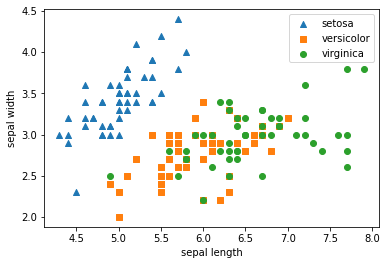

In [9]:
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

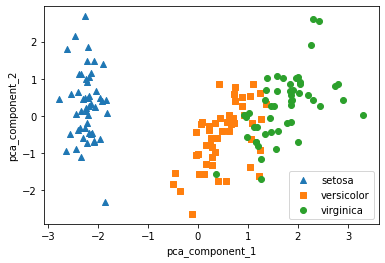

In [10]:
#pca_component_1 을 x축, pc_component_2 를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
  x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker= marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [11]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [13]:
rcf = RandomForestClassifier(random_state=156)

In [14]:
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv = 3)

In [15]:
scores

array([0.98, 0.94, 0.96])

In [16]:
np.mean(scores)

0.96

In [17]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]

In [18]:
scores_pca = cross_val_score(rcf, pca_X , iris.target , scoring = 'accuracy', cv=3)

In [19]:
scores_pca

array([0.88, 0.88, 0.88])

In [20]:
np.mean(scores_pca)

0.88

https://archive.ics.uci.edu/ml/machine-learning-databases/00350/


In [21]:
!cp drive/MyDrive/credit_card.xls .

In [22]:
ls

credit_card.xls  drive/  sample_data/


In [23]:
pip install --upgrade xlrd 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
df = pd.read_excel('credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]

In [27]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

1. 피처 이름 조정(PAY_0 -> 1 , default)

2. sns, heatmap 을 그려 각피처들의 상관 관계를 알아내기 : 2 종류의 feature

3. 위에서 찾아낸 2개의 그룹 피처에 대해 주성분을 2개로 축소했을때 분산을 얼마나 설명하는지 알아보자 *(explained_variance_ratio_ 사용)

4. 차원 축소 없이 , RandomForest를 사용하여 분류하기 (cross_val_score 사용)

5. 24개의 피처를 6개의 주 성분으로 축소한 후 RandomForest를 사용하여 분류하기  

In [43]:
df.rename(columns={"PAY_0": "PAY_1"}, inplace=True)
df.rename(columns={"default payment next month": "default"}, inplace=True)

In [44]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [45]:
y_target = df['default']
X_features = df.iloc[:,:-1]

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

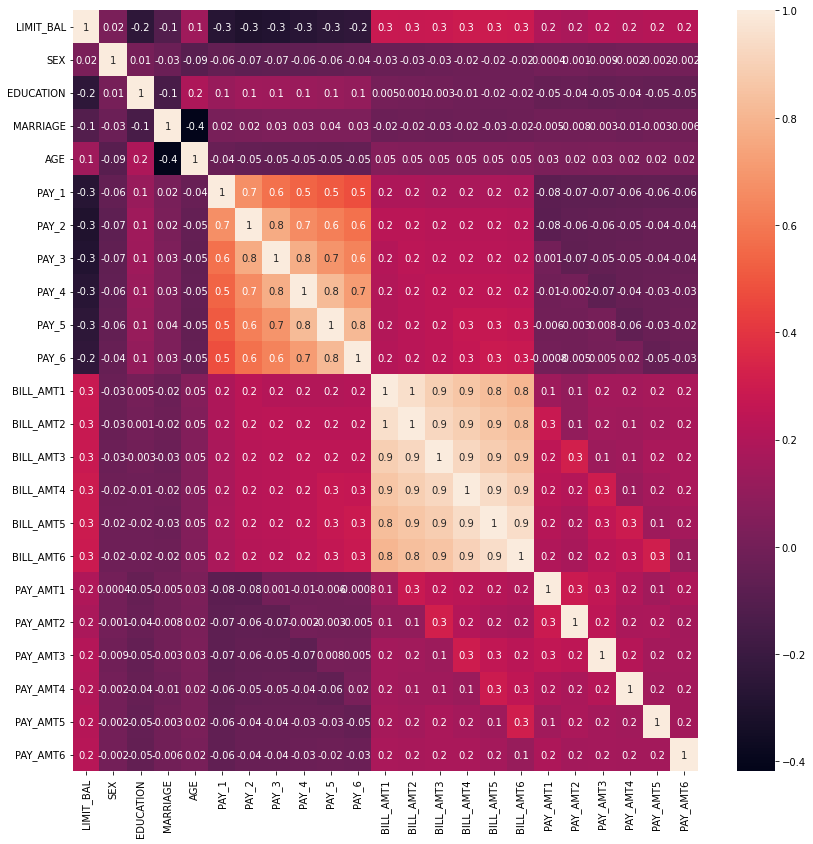

In [47]:
corr = X_features.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt = '.1g')

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [49]:
cols_bill = ['BILL_AMT' + str(i) for i in range(1,7)]

In [50]:
cols_bill

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

#표준화

In [51]:
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

In [52]:
pca = PCA(n_components= 2)
pca.fit(df_cols_scaled)
pca.explained_variance_ratio_

array([0.90645886, 0.05028851])

In [54]:
cols_pay = ['PAY_' +str(i) for i in range(1,7)]

In [55]:
cols_pay

['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [56]:
cols_pay = scaler.fit_transform(X_features[cols_pay])

In [57]:
pca = PCA(n_components=2)
pca.fit(cols_pay)
pca.explained_variance_ratio_

array([0.71638347, 0.11672182])

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [61]:
from numpy.random.mtrand import RandomState
rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy' ,cv=3)

In [62]:
scores , np.mean(scores)

(array([0.80662815, 0.81909395, 0.82142495]), 0.8157156852809027)

In [63]:
df_scaled = scaler.fit_transform(X_features)

In [64]:
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)

In [66]:
rcf = RandomForestClassifier(n_estimators =300, random_state=156)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)